<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p> 
<p><font size="5" color='grey'> <b>
Natural Language Processing  - Neural Network - SPAM or HAM
</b></font> </br></p> 

---

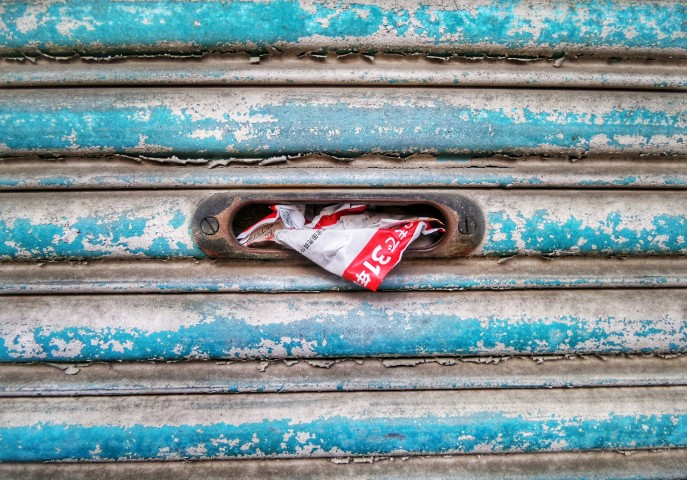

Foto von <a href="https://unsplash.com/@possessedphotography?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Possessed Photography</a> auf <a href="https://unsplash.com/de/fotos/oIMXkEuiXpc?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

# **1 <font color='orange'>|</font> Understand**
---

<p><font color='black' size="5">
Warnungen ausschalten
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   


Diese DataSet wurde aus Recherchequellen im Internet zusammengestellt: -> Eine Sammlung von 425 SMS-Spam-Nachrichten wurde manuell von der Grumbletext-Website extrahiert. Dies ist ein britisches Forum, in dem Mobiltelefonnutzer öffentliche Behauptungen über SMS-Spam-Nachrichten aufstellen, die meisten von ihnen, ohne die empfangene Spam-Nachricht selbst zu melden. Die Identifizierung des Textes von Spam-Nachrichten in den Ansprüchen ist eine sehr schwierige und zeitaufwändige Aufgabe und erforderte das sorgfältige Scannen von Hunderten von Webseiten.

Das Ziel ist es, ein Vorhersagemodell zu erstellen, das bestimmt, ob eine Textnachricht Spam oder Ham ist.


[Info](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

[DataSet](https://archive-beta.ics.uci.edu/dataset/228/sms+spam+collection)






Foto von <a href="https://unsplash.com/@nhillier?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Nick Hillier</a> auf <a href="https://unsplash.com/de/fotos/yD5rv8_WzxA?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/SMSSpamCollection", sep='\t', header=None, names=['class', 'msg'])

In [ ]:
data = df['msg'].copy()
target = df['class'].replace(['ham', 'spam'], [0,1]).copy()

In [ ]:
data.shape, target.shape

In [ ]:
data[26]

# **2 <font color='orange'>|</font> Prepare**
---


<p><font color='black' size="5">
Erstellen von Arrays aus DataFrames - wird von Keras erwartet
</font></p>

In [ ]:
target = np.array(target)

<p><font color='black' size="5">
Tokenizer
</font></p>

Der Datensatz wird tokenisiert (`Tokenizer`). Jedem Wort wird eine eindeutige Nummer zugewiesen - die für das neuronale Netzwerk erforderlich ist, um die Eingabe zu interpretieren.
   
[Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

In [ ]:
num_words_= 10000             # die maximale Anzahl der zu behaltenden Wörter, basierend auf der Worthäufigkeit
oov_tok_ = "<OOV>"            # wird zu word_index hinzugefügt & und bei fehlenden Wörte bei text_to_sequence-Aufrufen verwendet

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = num_words_, oov_token=oov_tok_)
tokenizer.fit_on_texts(data)
word_index = tokenizer.word_index

In [ ]:
type(word_index), len(word_index)

In [ ]:
[(key, value) for key, value in word_index.items()][3019:3024]

<p><font color='black' size="5">
Text 2 Sequenz
</font></p>

Diese Tokens (Wörter) werden dann in Sequenzen sortiert, um sicherzustellen, dass die Tokens für jedes Wort der richtigen Reihenfolge folgen, wie sie von jedem Satz vorgegeben wird.


[text_to_word_sequence](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/text_to_word_sequence)

In [ ]:
sequences = tokenizer.texts_to_sequences(data)

In [ ]:
type(sequences), len(sequences)

In [ ]:
sequences[26]

<p><font color='black' size="5">
Padding
</font></p>

Damit jeder Satz gleich lang ist, werden am Ende eines Satzes Nullen einfügt. Dies ist erforderlich, wenn ein Satz länger als ein anderer ist, da jeder Satz zum Zweck der Analyse durch das RNN gleich lang sein muss.

[pad_sequence](https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 100            # optional, maximale Länge der Sequenzen
trunc_type='post'           # Entfernt Worte aus Sequenzen, die größer als maxlen sind, entweder am Anfang oder am Ende der Sequenzen           
padding_type='post'         # Auffüllen entweder vor oder nach jeder Sequenz

data_padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
data_padded[26]

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">
Zufallszahl setzen
</font></p>

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

<p><font color='black' size="5">
Train-Test-Split
</font></p>

In [ ]:
from sklearn.model_selection import train_test_split
data_train , data_test , target_train , target_test  = train_test_split(data_padded, target, test_size=0.2, random_state=42, stratify=target)
data_train.shape , data_test.shape , target_train.shape , target_test.shape

<p><font color='black' size="5">
Modellierung eines Neuronalen Netzes
</font></p>

[Core layers](https://keras.io/api/layers/core_layers/)    
[Reshaping layers](https://keras.io/api/layers/reshaping_layers/)   
[Layer activation functions](https://keras.io/api/layers/activations/)   


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [ ]:
input_dim_ = num_words_
output_dim_ = 16  

model = Sequential()
model.add(Embedding(input_dim_, output_dim_, input_length=max_length))
model.add(Flatten())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

<p><font color='black' size="5">
Einfaches Layer-Diagramm
</font></p>

In [ ]:
model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<p><font color='black' size="5">
Training
</font></p>


In [ ]:
%%time
epochs_ = 10
history = model.fit(data_train, target_train, validation_split=0.2, epochs=epochs_)

In [ ]:
print(history.params)
print(history.history.keys())

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">
Accuracy Train
</font></p>

In [ ]:
score = model.evaluate(data_train, target_train, verbose=0)
print(f"Train loss: {float(score[0]):.3f}")
print(f"Train accuracy: {float(score[1] * 100):.3f}%")

<p><font color='black' size="5">
Accuracy Test
</font></p>

In [ ]:
score = model.evaluate(data_test, target_test, verbose=0)
print(f"Test loss: {float(score[0]):.3f}")
print(f"Test accuracy: {float(score[1] * 100):.3f}%")

<p><font color='black' size="5">
Vergleich ausgewähler Datensätze
</font></p>

In [ ]:
target_pred = model.predict(data_test)

In [ ]:
for row in range(200,210):
  print(f"Real:  {target_test[row]} Pred: {float(target_pred[row]):.2f}")

<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [ ]:
target_pred_ = np.around(target_pred, 0)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(target_test, target_pred_)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['negativ','positiv']) 
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(target_test, target_pred_, target_names=['negativ','positiv']))

<p><font color='black' size="5">
Einzelne Aussagen - Real vs. Predict
</font></p>

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '') for i in text])

In [ ]:
for example in range(200,210):
  print('Real: ', target_test[example], 'Pred: ', int(np.around(float(target_pred[example]),0)), " -- ", decode_review(data_test[example]), sep=" ")

# **5 <font color='orange'>|</font> Deploy**
---